#### Augmenting building images -- to generate synthetic data for test-training: 

- refs: http://localhost:8888/notebooks/REFS_and_LINKS.ipynb 


- ref:  http://localhost:8888/notebooks/test_ImageDataGenerator.ipynb
- ref:  http://localhost:8888/notebooks/Use_ImageDataGenerator_makeSynthetic_v0.ipynb



#### General REQs

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# !pwd
# path='/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge'
path = '/home/ubuntu/pynb/DG_datachallenge'


#### File paths

In [3]:
## Get fullpaths to img files
import glob, os, sys

btmp = glob.glob(os.path.join(path+'/building_set/buildings/','*.tif')) #os.listdir( path+'/building_set/buildings/' )
# buildingFileNames
nbtmp = glob.glob(os.path.join(path+'/building_set/no_buildings/','*.tif')) #os.listdir( path+'/building_set/no_buildings' )
# nobuildingFileNames

buildingFileNames = btmp
nobuildingFileNames = nbtmp


In [4]:
len(buildingFileNames),len(nobuildingFileNames)

(2000, 20000)

In [ ]:
buildingFileNames[0] 
# '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/289840.tif'

In [ ]:
[img for img in buildingFileNames][-1]
# '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/658029.tif'

### ImageDataGeneration ...

In [5]:
# Standardize images across the dataset, mean=0, stdev=1
# XX K.set_image_dim_ordering('th')

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import backend as K

cnt = 0
N = 0 
imgC = 200


# for imgN in range(0,len(buildingFileNames)):
for imgN in buildingFileNames:
    #load img
    #img = load_img(buildingFileNames[imgN])  # this is a PIL image | float32
    img = load_img(imgN)  # this is a PIL image | float32
    # preprocess to shape keras needs
    x = img_to_array(img)
    #x.shape
    xx = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])

    ## define data preparation
    datagen = ImageDataGenerator(
                                ##rotation_range=180,
                                rotation_range=2,
                                horizontal_flip=True,
                                vertical_flip=True,                            
                                ##zoom_range = [0.8,0.8],                            
                                )

    ## fit parameters from data
    # datagen.fit(X_train)
    datagen.fit(xx,augment=True)
    
    
    #plt.figure(figsize=(4,4))
    i = 0
    for batch in datagen.flow(xx, batch_size=1,
                              save_to_dir=path+'/building_set/augmented', 
                              #save_prefix='b_'+ buildingFileNames[imgN].split('/')[-1][:-4] +'_', 
                              save_prefix='b_'+ imgN.split('/')[-1][:-4] +'_', 
                              save_format='tif'
                             ):

        #for n in range(0, 9):
        #   plt.subplot(330 + 1 + i)
        #   plt.imshow(array_to_img(batch[0]))

        i += 1
        if i == 10: #20:
            break
            #continue
    
    #print('Augmenting Img #' + format(imgN) + ' : '+ buildingFileNames[imgN].split('/')[-1] + ' -------')
    
    if cnt%imgC==0:
        if N==0 & cnt==0:
            #print('start augmenting....' + format(imgN))
            print('start augmenting....' + format(cnt))
        else:
            print('augmented {0} images ...'.format((N*imgC)) )
        N += 1        
    
    cnt += 1

## Done... print:            
print('augmented {0} images ...'.format(cnt))


Using TensorFlow backend.


start augmenting..../home/ubuntu/pynb/DG_datachallenge/building_set/buildings/289840.tif
augmented 200 images ...
augmented 400 images ...
augmented 600 images ...
augmented 800 images ...
augmented 1000 images ...
augmented 1200 images ...
augmented 1400 images ...
augmented 1600 images ...
augmented 1800 images ...
augmented 2000 images ...


In [7]:
cnt, imgN

(2000, '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/658029.tif')

In [8]:
abtmp = glob.glob(os.path.join(path+'/building_set/augmented/','*.tif'))

In [9]:
len(abtmp)

19989

In [87]:
2000*9

18000

In [10]:
19989/10

1998.9

In [11]:
len(list(range(0,len(buildingFileNames))))

2000

## checktest

Augmenting Img: 314787.tif -------
Augmenting Img: 431807.tif -------
Augmenting Img: 763158.tif -------
Augmenting Img: 352120.tif -------
Augmenting Img: 246733.tif -------
Augmenting Img: 653328.tif -------


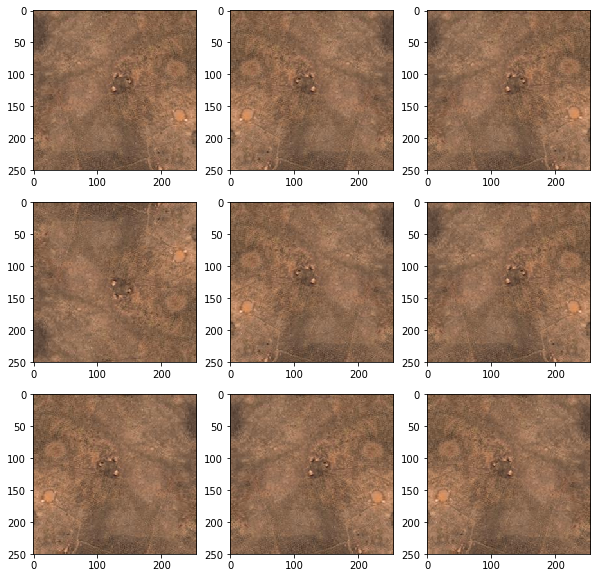

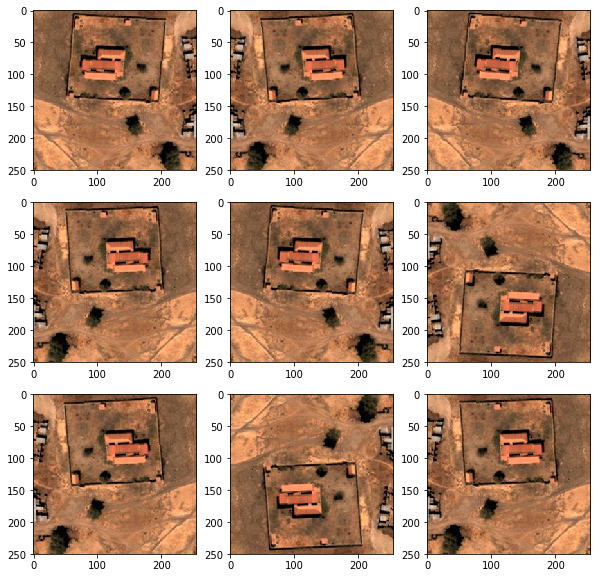

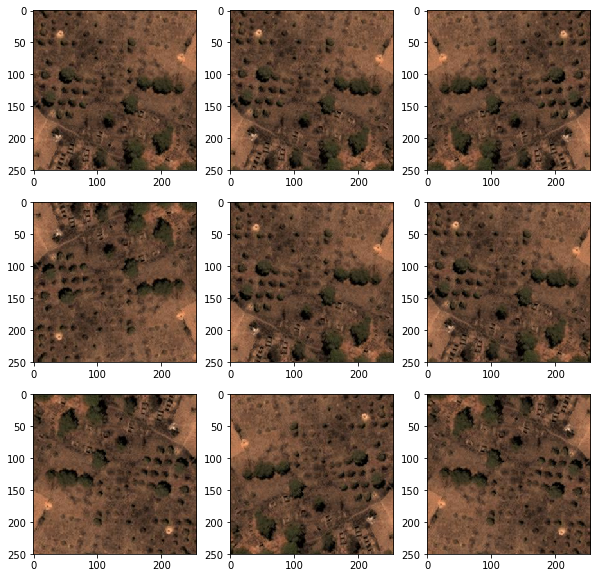

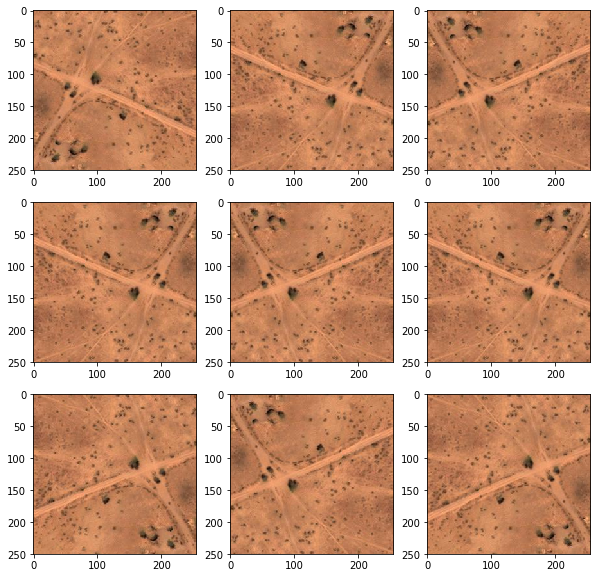

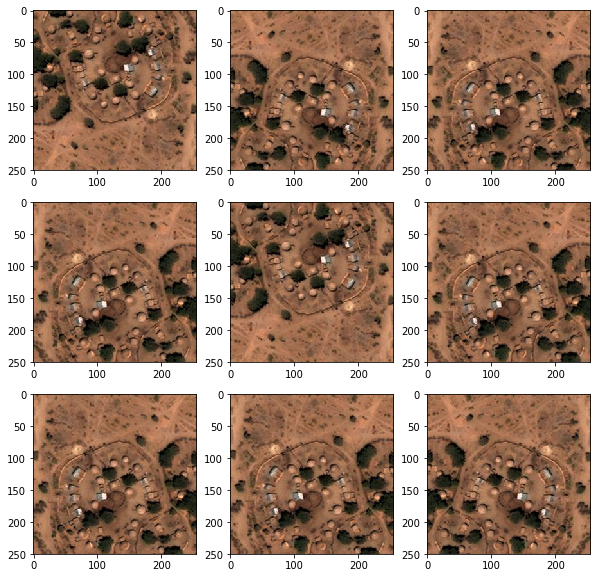

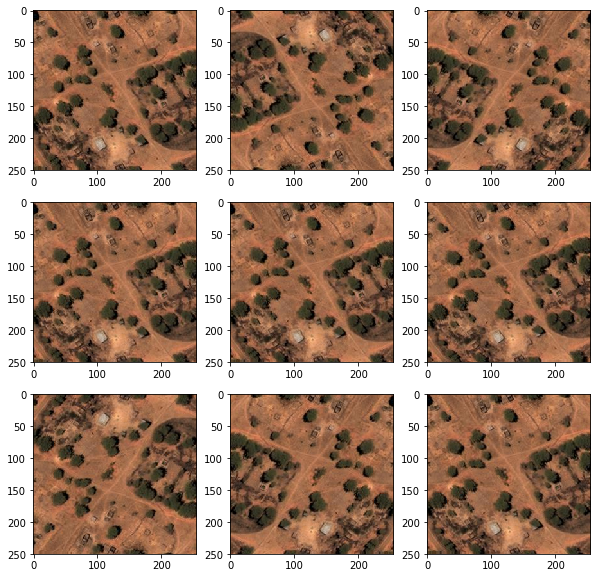

In [18]:
# Standardize images across the dataset, mean=0, stdev=1
# XX K.set_image_dim_ordering('th')

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import backend as K

fa= 1220
fb= 1226

for imgN in range(len(buildingFileNames[fa:fb])):
    #load img
    img = load_img(buildingFileNames[fa:fb][imgN])  # this is a PIL image | float32
    # preprocess to shape keras needs
    x = img_to_array(img)
    #x.shape
    xx = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])

    ## define data preparation
    datagen = ImageDataGenerator(
                                ##rotation_range=180,
                                rotation_range=2,
                                horizontal_flip=True,
                                vertical_flip=True,                            
                                ##zoom_range = [0.8,0.8],                            
                                )

    # fit parameters from data
    # datagen.fit(X_train)
    datagen.fit(xx,augment=True)
    
    print('Augmenting Img: ' + buildingFileNames[fa:fb][imgN].split('/')[-1] + ' -------')
    
    plt.figure(figsize=(10,10))
    i = 0
    for batch in datagen.flow(xx, batch_size=1,
#                               save_to_dir=path+'/building_set/augmented', 
#                               save_prefix='b_'+ buildingFileNames[imgN].split('/')[-1][:-4] +'_', 
#                               save_format='tif'
                             ):

        for n in range(0, 9):
           plt.subplot(330 + 1 + i)
           plt.imshow(array_to_img(batch[0]))

        i += 1
        if i >= 9: #20:
            break     

In [8]:
!pwd

/home/ubuntu/pynb/DG_datachallenge


In [19]:
img0 = load_img('/home/ubuntu/pynb/DG_datachallenge/building_set/augmented/b_352120__0_1528.tif') 

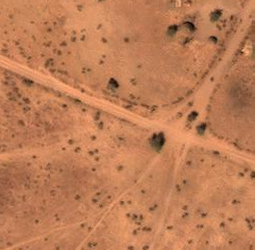

In [20]:
img0

In [21]:
img_to_array(img0).shape

(250, 255, 3)